In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from pathlib import Path

### NN - RHC

In [2]:
rhc_file = "output/NN_OUTPUT/NN_RHC_phishingwebsite_LOG.csv"
drhc = pd.read_csv(Path(rhc_file))

In [3]:
drhc.head()

,iteration,MSE_trg,MSE_val,MSE_tst,acc_trg,acc_val,acc_tst,f1_trg,f1_val,f1_tst,elapsed
0,0,0.142368,0.143147,0.144218,0.488198,0.484454,0.471732,0.634058,0.631068,0.615030,0.011440
1,1,0.142336,0.143083,0.144171,0.487350,0.485020,0.470375,0.633229,0.631323,0.613659,0.031872
2,2,0.142598,0.143306,0.144437,0.486360,0.483324,0.467209,0.632484,0.630259,0.610707,0.042742
3,3,0.141465,0.142279,0.143350,0.484947,0.479367,0.466757,0.626639,0.621144,0.606081,0.052943
4,4,0.142642,0.143743,0.144562,0.480848,0.476540,0.465400,0.622547,0.621113,0.605474,0.063881


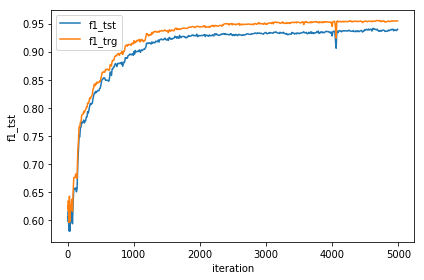

In [4]:
# plot iteration vs f1 score 
plt.figure()
plt.plot(drhc.iteration.values, drhc.f1_tst.values, '-', label='f1_tst')
plt.plot(drhc.iteration.values, drhc.f1_trg.values, '-', label='f1_trg')
plt.xlabel('iteration')
plt.ylabel('f1_tst')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

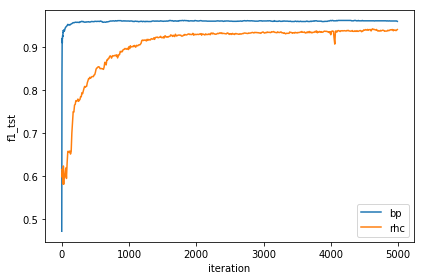

In [5]:
# compared with bp 
bp_file = "output/NN_OUTPUT/NN_Backprop_phishingwebsite_LOG.csv"
dbp = pd.read_csv(Path(bp_file))

plt.figure()
plt.plot(dbp.iteration.values, dbp.f1_tst.values, '-', label='bp')
plt.plot(drhc.iteration.values, drhc.f1_tst.values, '-', label='rhc')
plt.xlabel('iteration')
plt.ylabel('f1_tst')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### NN - SA

In [6]:
sa_file = "output/NN_OUTPUT/NN_SA_phishingwebsite_{}_LOG.csv"
ce_list = [0.15, 0.30, 0.45, 0.60, 0.75, 0.95]

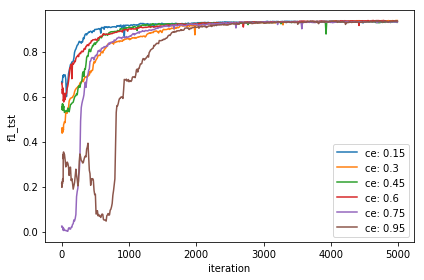

In [7]:
# plot iteration vs f1 score 
plt.figure()
for ce in ce_list:
    dsa = pd.read_csv(Path(sa_file.format(ce)))
    plt.plot(dsa.iteration.values, dsa.f1_tst.values, '-', label='ce: '+str(ce))
plt.xlabel('iteration')
plt.ylabel('f1_tst')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

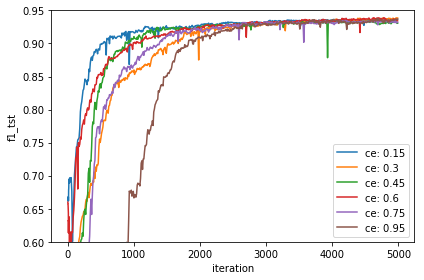

In [8]:
# plot iteration vs f1 score 
plt.figure()
for ce in ce_list:
    dsa = pd.read_csv(Path(sa_file.format(ce)))
    plt.plot(dsa.iteration.values, dsa.f1_tst.values, '-', label='ce: '+str(ce))
plt.xlabel('iteration')
plt.ylabel('f1_tst')
plt.legend(loc='best')
plt.ylim(0.6, 0.95)
plt.tight_layout()
plt.show()

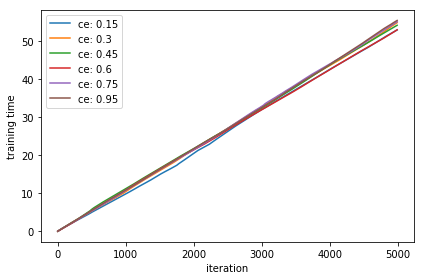

In [9]:
# plot iteration vs training time
plt.figure()
for ce in ce_list:
    dsa = pd.read_csv(Path(sa_file.format(ce)))
    plt.plot(dsa.iteration.values, dsa.elapsed.values, '-', label='ce: '+str(ce))
plt.xlabel('iteration')
plt.ylabel('training time')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### NN - GA

In [10]:
ga_file = "output/NN_OUTPUT/NN_GA_phishingwebsite_{}_{}_{}_LOG.csv"
colormap = plt.cm.gist_ncar
gaconf_list = [(50, 10, 10), (50, 20, 10), (50, 20, 20), (100, 20, 20)]
color_list = ['orange', 'chocolate', 'red', 'dodgerblue']
gaconf_dict = dict(zip(gaconf_list, color_list))

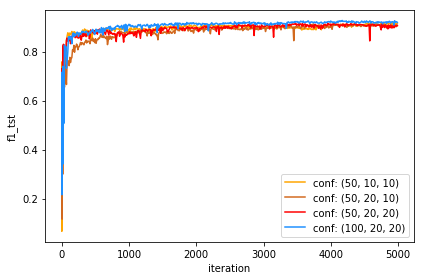

In [11]:
# plot iteration vs f1 score 
plt.figure()
for gaconf in gaconf_dict:
    dga = pd.read_csv(Path(ga_file.format(*gaconf)))
    plt.plot(dga.iteration.values, dga.f1_tst.values, color=gaconf_dict[gaconf], label='conf: '+str(gaconf))
plt.xlabel('iteration')
plt.ylabel('f1_tst')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

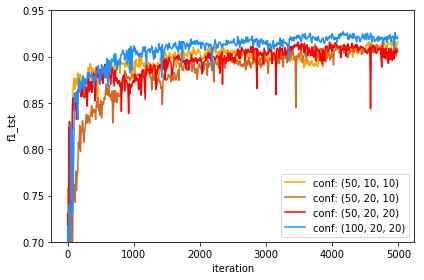

In [12]:
# plot iteration vs f1 score 
plt.figure()
for gaconf in gaconf_dict:
    dga = pd.read_csv(Path(ga_file.format(*gaconf)))
    plt.plot(dga.iteration.values, dga.f1_tst.values, color=gaconf_dict[gaconf], label='conf: '+str(gaconf))
plt.xlabel('iteration')
plt.ylabel('f1_tst')
plt.legend(loc='lower right')
plt.ylim((0.7,0.95))
plt.tight_layout()
plt.show()

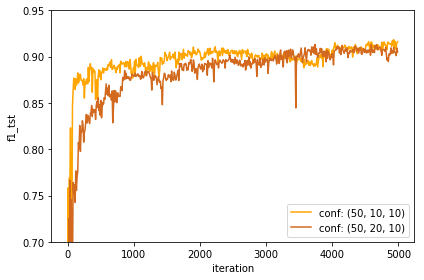

In [13]:
# plot iteration vs f1 score 
plt.figure()
for gaconf in [(50, 10, 10), (50, 20, 10)]:
    dga = pd.read_csv(Path(ga_file.format(*gaconf)))
    plt.plot(dga.iteration.values, dga.f1_tst.values, color=gaconf_dict[gaconf], label='conf: '+str(gaconf))
plt.xlabel('iteration')
plt.ylabel('f1_tst')
plt.legend(loc='lower right')
plt.ylim((0.7,0.95))
plt.tight_layout()
plt.show()

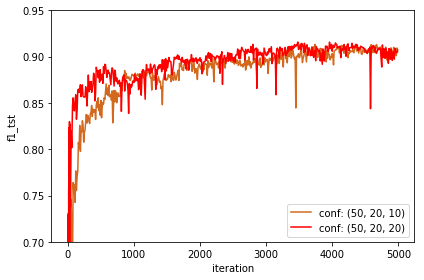

In [14]:
# plot iteration vs f1 score 
plt.figure()
for gaconf in [(50, 20, 10), (50, 20, 20)]:
    dga = pd.read_csv(Path(ga_file.format(*gaconf)))
    plt.plot(dga.iteration.values, dga.f1_tst.values, color=gaconf_dict[gaconf], label='conf: '+str(gaconf))
plt.xlabel('iteration')
plt.ylabel('f1_tst')
plt.legend(loc='lower right')
plt.ylim((0.7,0.95))
plt.tight_layout()
plt.show()

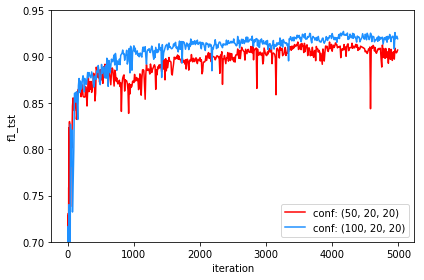

In [15]:
# plot iteration vs f1 score 
plt.figure()
for gaconf in [(50, 20, 20), (100, 20, 20)]:
    dga = pd.read_csv(Path(ga_file.format(*gaconf)))
    plt.plot(dga.iteration.values, dga.f1_tst.values, color=gaconf_dict[gaconf], label='conf: '+str(gaconf))
plt.xlabel('iteration')
plt.ylabel('f1_tst')
plt.legend(loc='lower right')
plt.ylim((0.7,0.95))
plt.tight_layout()
plt.show()

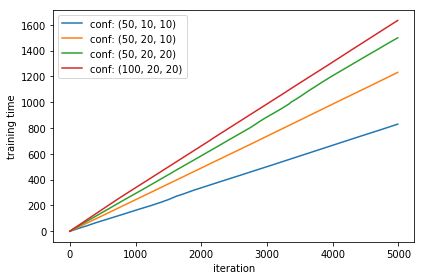

In [16]:
# plot iteration vs training time
plt.figure()
for gaconf in gaconf_list:
    dga = pd.read_csv(Path(ga_file.format(*gaconf)))
    plt.plot(dga.iteration.values, dga.elapsed.values, '-', label='conf: '+str(gaconf))
plt.xlabel('iteration')
plt.ylabel('training time')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### NN - Comparison

In [17]:
drhc_best = pd.read_csv(Path(rhc_file))
dsa_best = pd.read_csv(Path(sa_file.format(0.15)))
dga_best = pd.read_csv(Path(ga_file.format(*(100, 20, 20))))

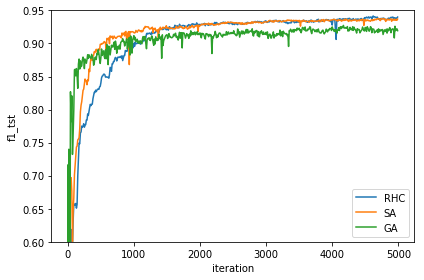

In [18]:
# plot iteration vs f1 score
plt.figure()
plt.plot(drhc_best.iteration.values, drhc_best.f1_tst.values, '-', label='RHC')
plt.plot(dsa_best.iteration.values, dsa_best.f1_tst.values, '-', label='SA')
plt.plot(dga_best.iteration.values, dga_best.f1_tst.values, '-', label='GA')
plt.xlabel('iteration')
plt.ylabel('f1_tst')
plt.legend(loc='best')
plt.ylim(0.6, 0.95)
plt.tight_layout()
plt.show()

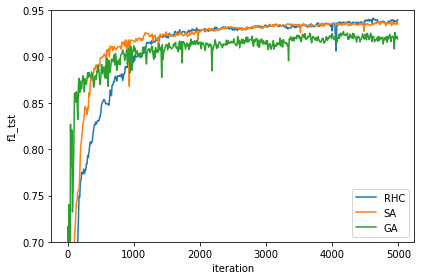

In [19]:
# plot iteration vs f1 score
plt.figure()
plt.plot(drhc_best.iteration.values, drhc_best.f1_tst.values, '-', label='RHC')
plt.plot(dsa_best.iteration.values, dsa_best.f1_tst.values, '-', label='SA')
plt.plot(dga_best.iteration.values, dga_best.f1_tst.values, '-', label='GA')
plt.xlabel('iteration')
plt.ylabel('f1_tst')
plt.legend(loc='best')
plt.ylim((0.7,0.95))
plt.tight_layout()
plt.show()

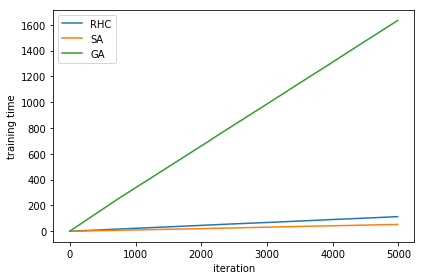

In [20]:
# plot iteration vs f1 score
plt.figure()
plt.plot(drhc_best.iteration.values, drhc_best.elapsed.values, '-', label='RHC')
plt.plot(dsa_best.iteration.values, dsa_best.elapsed.values, '-', label='SA')
plt.plot(dga_best.iteration.values, dga_best.elapsed.values, '-', label='GA')
plt.xlabel('iteration')
plt.ylabel('training time')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

##### helper function, setting

In [21]:
def get_average_res(algoconf_dict, pfile, verbose=False):
    algo_res = {}
    for algoconf, files in algoconf_dict.items():
        if verbose: print ( [pfile.format(*file) for file in files] )
        algo_dfs = [pd.read_csv(Path(pfile.format(*file))) for file in files]
        algo_df_tmp = pd.concat(algo_dfs)
        algo_df = algo_df_tmp.groupby(level=0).mean()
        algo_res[algoconf] = algo_df
    return algo_res

def plot_iter(data_algo_res, col):
    # plot iteration vs rhc score
    plt.figure()
    for algoconf, dfres in data_algo_res.items():
        plt.plot(dfres.iterations.values, dfres[col].values, '-', label=str(algoconf))
    plt.xlabel('iteration')
    plt.ylabel(col)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()   
     
def plot_crx_iter(data_algo_dict, col):
    # choose the params with best performance
    rhc_bst, rhc_res = data_algo_dict['RHC']['bst_param'], data_algo_dict['RHC']['res']
    sa_bst, sa_res = data_algo_dict['SA']['bst_param'], data_algo_dict['SA']['res']
    ga_bst, ga_res = data_algo_dict['GA']['bst_param'], data_algo_dict['GA']['res']
    mimic_bst, mimic_res = data_algo_dict['MIMIC']['bst_param'], data_algo_dict['MIMIC']['res']

    plt.figure()
    plt.plot(rhc_res[rhc_bst].iterations.values, rhc_res[rhc_bst][col].values, '-', label=rhc_bst)
    plt.plot(sa_res[sa_bst].iterations.values, sa_res[sa_bst][col].values, '-', label=sa_bst)
    plt.plot(ga_res[ga_bst].iterations.values, ga_res[ga_bst][col].values, '-', label=ga_bst)
    plt.plot(mimic_res[mimic_bst].iterations.values, mimic_res[mimic_bst][col].values, '-', label=mimic_bst)
    plt.xlabel('iteration')
    plt.ylabel(col)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

In [22]:
rhcconf_dict = {'RHC':[('RHC', i) for i in range(1,6)]}
saconf_dict = {'SA'+str(ce):[('SA'+str(ce), i) for i in range(1,6)] for ce in [0.15, 0.35, 0.55, 0.75, 0.95]}
gaconf_dict = {'GA'+str(pop)+'_'+str(mate)+'_'+str(mutate):[('GA'+str(pop)+'_'+str(mate)+'_'+str(mutate), i) for i in range(1,6)] for pop, mate, mutate in product([100], [50, 30, 10], [50, 30, 10])}
mimicconf_dict = {'MIMIC'+str(sample)+'_'+str(keep)+'_'+str(m):[('MIMIC'+str(sample)+'_'+str(keep)+'_'+str(m), i) for i in range(1,6)] for sample, keep, m in product([100], [50], [0.1, 0.3, 0.5, 0.7, 0.9])}

### TSP

In [23]:
tsp_file = "output/TSP/TSP_{}_{}_LOG.csv"
tsp_rhc_res = get_average_res(rhcconf_dict, tsp_file)
tsp_sa_res = get_average_res(saconf_dict, tsp_file)
tsp_ga_res = get_average_res(gaconf_dict, tsp_file)
tsp_mimic_res = get_average_res(mimicconf_dict, tsp_file)

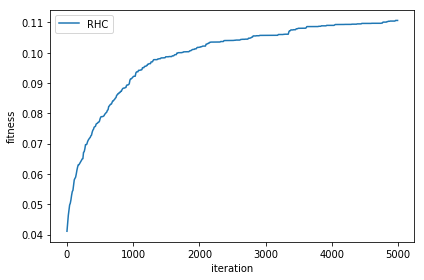

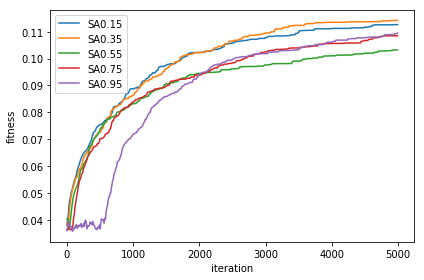

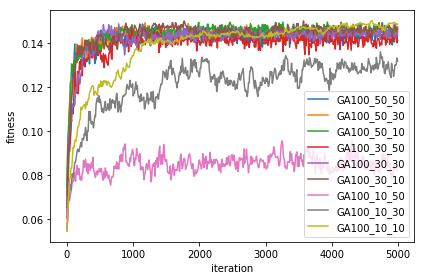

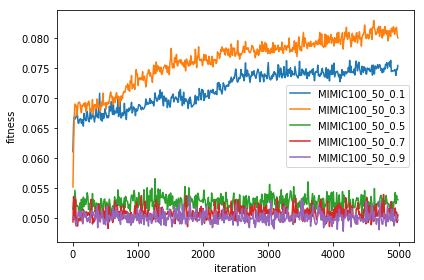

In [24]:
plot_iter(tsp_rhc_res, 'fitness')
plot_iter(tsp_sa_res, 'fitness')
plot_iter(tsp_ga_res, 'fitness')
plot_iter(tsp_mimic_res, 'fitness')

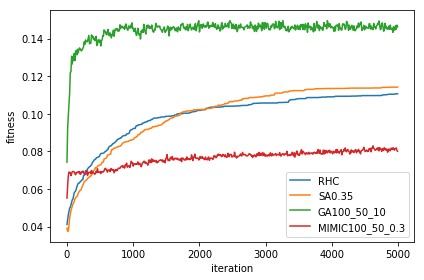

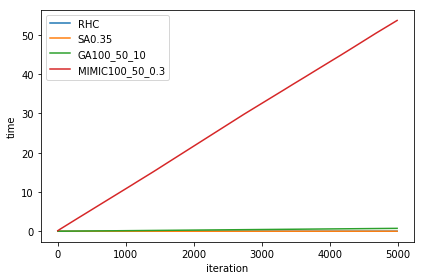

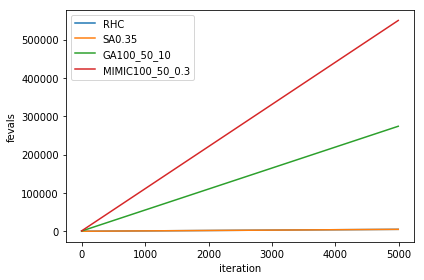

In [25]:
data_algo_dict = {
    'RHC': { 'bst_param': 'RHC', 'res': tsp_rhc_res },
    'SA': { 'bst_param': 'SA0.35', 'res': tsp_sa_res },
    'GA': { 'bst_param': 'GA100_50_10', 'res': tsp_ga_res },
    'MIMIC': { 'bst_param': 'MIMIC100_50_0.3', 'res': tsp_mimic_res },
}
plot_crx_iter(data_algo_dict, 'fitness')
plot_crx_iter(data_algo_dict, 'time')
plot_crx_iter(data_algo_dict, 'fevals')

### Continuous Peaks

In [26]:
cp_file = "output/CONTPEAKS/CONTPEAKS_{}_{}_LOG.csv"
cp_rhc_res = get_average_res(rhcconf_dict, cp_file)
cp_sa_res = get_average_res(saconf_dict, cp_file)
cp_ga_res = get_average_res(gaconf_dict, cp_file)
cp_mimic_res = get_average_res(mimicconf_dict, cp_file)

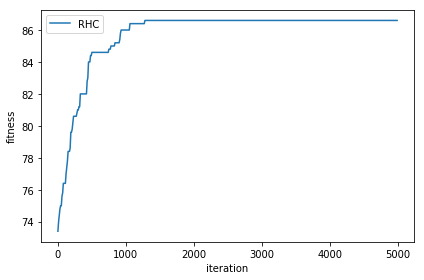

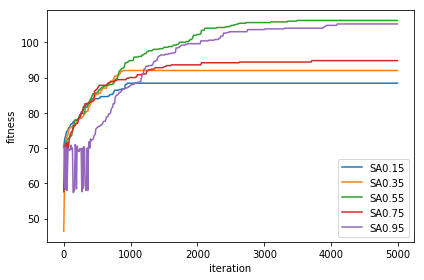

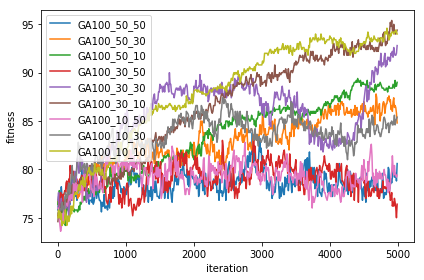

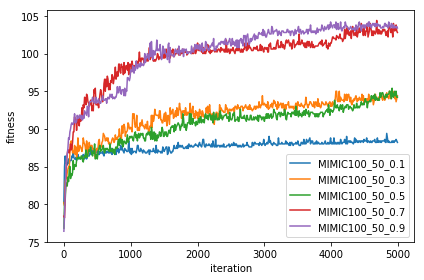

In [27]:
plot_iter(cp_rhc_res, 'fitness')
plot_iter(cp_sa_res, 'fitness')
plot_iter(cp_ga_res, 'fitness')
plot_iter(cp_mimic_res, 'fitness')

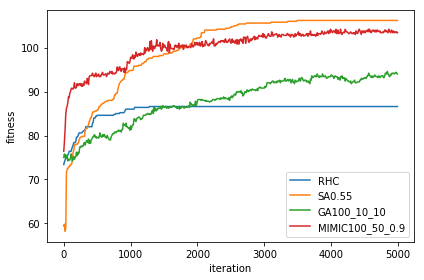

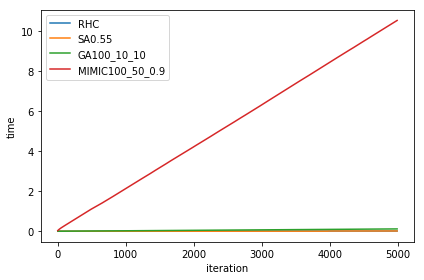

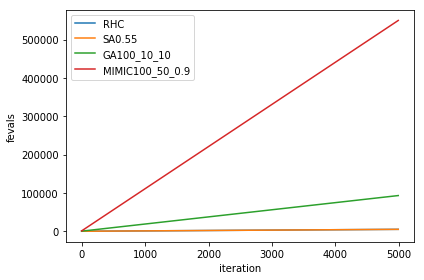

In [28]:
data_algo_dict = {
    'RHC': { 'bst_param': 'RHC', 'res': cp_rhc_res },
    'SA': { 'bst_param': 'SA0.55', 'res': cp_sa_res },
    'GA': { 'bst_param': 'GA100_10_10', 'res': cp_ga_res },
    'MIMIC': { 'bst_param': 'MIMIC100_50_0.9', 'res': cp_mimic_res },
}
plot_crx_iter(data_algo_dict, 'fitness')
plot_crx_iter(data_algo_dict, 'time')
plot_crx_iter(data_algo_dict, 'fevals')

### Flipflop

In [29]:
ff_file = "output/FLIPFLOP/FLIPFLOP_{}_{}_LOG.csv"
ff_rhc_res = get_average_res(rhcconf_dict, ff_file)
ff_sa_res = get_average_res(saconf_dict, ff_file)
ff_ga_res = get_average_res(gaconf_dict, ff_file)
ff_mimic_res = get_average_res(mimicconf_dict, ff_file)

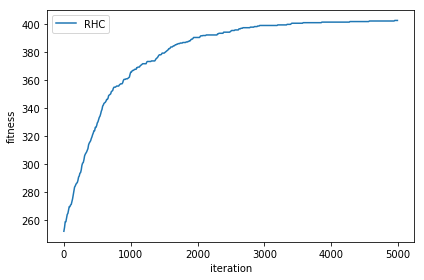

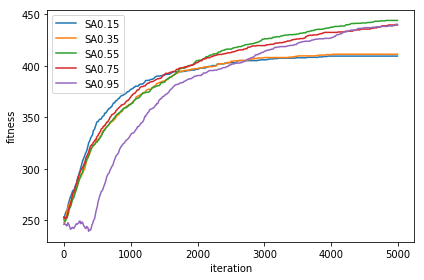

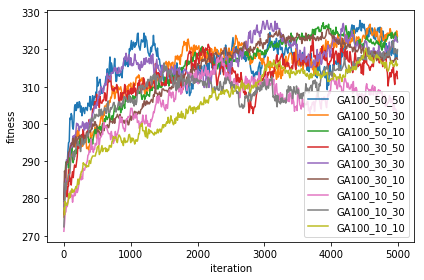

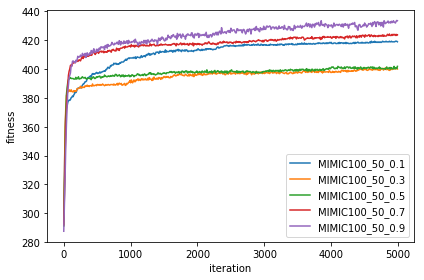

In [30]:
plot_iter(ff_rhc_res, 'fitness')
plot_iter(ff_sa_res, 'fitness')
plot_iter(ff_ga_res, 'fitness')
plot_iter(ff_mimic_res, 'fitness')

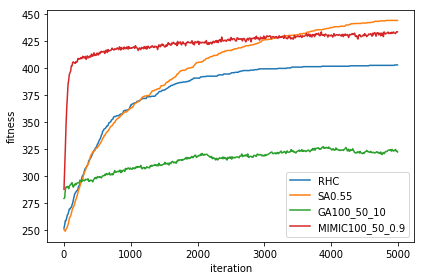

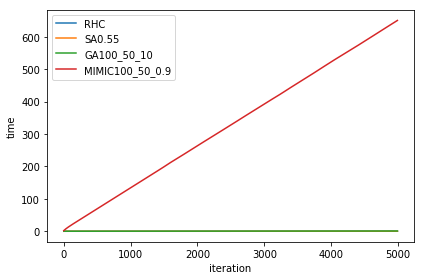

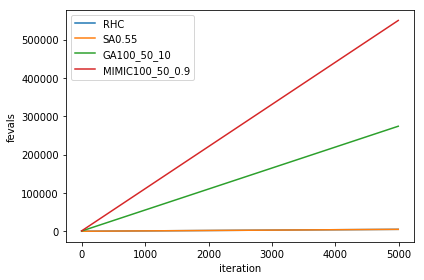

In [31]:
data_algo_dict = {
    'RHC': { 'bst_param': 'RHC', 'res': ff_rhc_res },
    'SA': { 'bst_param': 'SA0.55', 'res': ff_sa_res },
    'GA': { 'bst_param': 'GA100_50_10', 'res': ff_ga_res },
    'MIMIC': { 'bst_param': 'MIMIC100_50_0.9', 'res': ff_mimic_res },
}
plot_crx_iter(data_algo_dict, 'fitness')
plot_crx_iter(data_algo_dict, 'time')
plot_crx_iter(data_algo_dict, 'fevals')

### KNAPSACK

In [32]:
ks_file = "output/KNAPSACK/KNAPSACK_{}_{}_LOG.csv"
ks_rhc_res = get_average_res(rhcconf_dict, ks_file)
ks_sa_res = get_average_res(saconf_dict, ks_file)
ks_ga_res = get_average_res(gaconf_dict, ks_file)
ks_mimic_res = get_average_res(mimicconf_dict, ks_file)

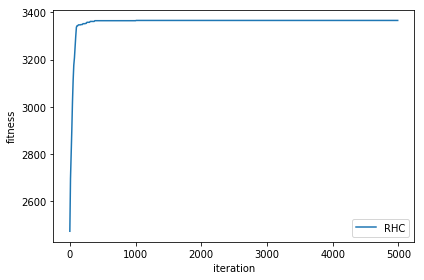

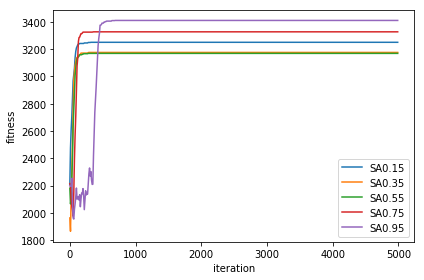

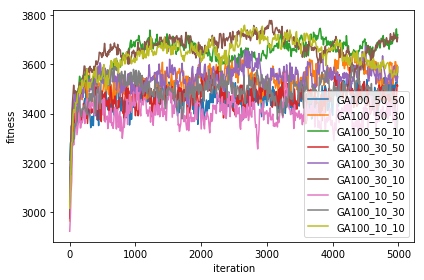

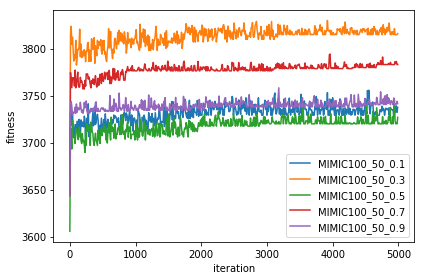

In [33]:
plot_iter(ks_rhc_res, 'fitness')
plot_iter(ks_sa_res, 'fitness')
plot_iter(ks_ga_res, 'fitness')
plot_iter(ks_mimic_res, 'fitness')

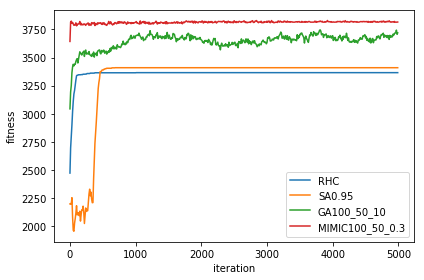

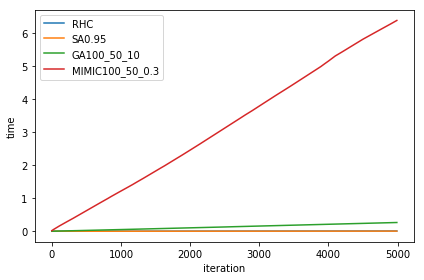

In [34]:
data_algo_dict = {
    'RHC': { 'bst_param': 'RHC', 'res': ks_rhc_res },
    'SA': { 'bst_param': 'SA0.95', 'res': ks_sa_res },
    'GA': { 'bst_param': 'GA100_50_10', 'res': ks_ga_res },
    'MIMIC': { 'bst_param': 'MIMIC100_50_0.3', 'res': ks_mimic_res },
}
plot_crx_iter(data_algo_dict, 'fitness')
plot_crx_iter(data_algo_dict, 'time')